# Features
Area_type – describes the area<br>
Availability – when it can be possessed or when it is ready(categorical and time-series)<br>
Location – where it is located in Bengaluru<br>
Price – Value of the property in lakhs(INR)<br>
Size – in BHK or Bedroom (1-10 or more)<br>
Society – to which society it belongs<br>
Total_sqft – size of the property in sq.ft<br>
Bath – No. of bathrooms<br>
Balcony – No. of the balcony<br>


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
train = pd.read_csv("Predicting-House-Prices-In-Bengaluru-Train-Data.csv")
train
#impute bhk by tsqft
#bath by bhk
#balcony by bhk

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [0]:
test = pd.read_csv("Predicting-House-Prices-In-Bengaluru-Test-Data.csv")
test

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [0]:
#total of 13320 rows and 9 columns
train

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [0]:
#info about set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [0]:
#columns with missing values
missing  = train.isna().sum()[train.isna().sum() != 0]
#society should be dropped
missing['size']

16

In [0]:
#checking all the entries in every columns with missing vaues
for i in missing.index:
  print(train[i].value_counts(),"\n")
  print('no of missing values {}'.format(missing[i]))
  print("*"*100)
  #make one class for more then 10 bedrooms

Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Prakruthi Township                      1
Akash Nagar                             1
Kirloskar layout, Basaveshwarnagar      1
IVC Road                                1
Konappana Agrahara                      1
Name: location, Length: 1305, dtype: int64 

no of missing values 1
****************************************************************************************************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK   

In [0]:
#checking all the entries in every columns without missing vaues
for i in train.columns:
  if i not in missing.index:
    print(train[i].value_counts())
    print("*"*100)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
****************************************************************************************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
15-Jun               1
14-Jul               1
15-Dec               1
14-Nov               1
Name: availability, Length: 81, dtype: int64
****************************************************************************************************
1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2365             1
2563 - 2733      1
1831             1
668              1
3329             1
Name: total_sqft, Length: 2117, dtype: int64
****************************************************************************************************

In [0]:
#dropping society as it has 5502 missing values and 2688 types
train.drop(columns = ['society'],inplace= True)

#Cleaning data 
1. Training data

In [0]:
train.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [0]:
#avaiblity will be changed to ready to move in and not ready to move in
def cleaner1(x):
  if x.strip().lower() == 'ready to move':
    return x
  elif x.strip().lower() == "immediate possession":
    return x
  else:
    return 'Not ready to move'
train['availability'] = train.availability.apply(lambda x : cleaner1(x))

In [0]:
#changing type to category
train.availability = train.availability.astype('category')

In [0]:
#cleaning size column
def cleaner2(x):
  try:
    return x.split(' ')[0]
  except:
    return x
train['size'] = train['size'].apply(lambda x : cleaner2(x))

In [0]:
#setting type to float
train['size'] = train['size'].astype('float')

In [0]:
import re

#cleaning function for total_sqft
def sqft_cleaner(i):
  try:
    return float(i)
  except:
    if len(i.split('-')) == 2:
      a = i.split('-')[0]
      b = i.split('-')[1]
      c = (float(a) + float(b))/2
      return c
    else:
      split_list = re.split('(\d*.*\d)', i)
      area = float(split_list[1])
      area_type = split_list[2]
      if area_type == 'Sq. Meter':
        area_sqft= area * 10.7639
      elif area_type == 'Sq. Yards':
        area_sqft= area * 9.0
      elif area_type == 'Perch':
        area_sqft= area * 272.25
      elif area_type == 'Acres':
        area_sqft= area * 43560.0
      elif area_type == 'Cents':
        area_sqft= area * 435.61545
      elif area_type == 'Guntha':
        area_sqft= area * 1089.0
      elif area_type == 'Grounds':
        area_sqft= area * 2400.0
      return float(area_sqft)

#applying function
train.total_sqft = train.total_sqft.apply(lambda x : sqft_cleaner(x))
train.total_sqft = train.total_sqft.astype('float')

In [0]:
train.bath.value_counts(dropna=False)

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
NaN       73
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
18.0       1
14.0       1
40.0       1
15.0       1
27.0       1
Name: bath, dtype: int64

In [0]:
train1 = train.copy()
train2 = train.copy()
train3 = train.copy()

In [0]:
train_dummy = pd.get_dummies(train,columns=['area_type','availability','location','size','balcony','bath'])

In [0]:
train_dummy.tail()

,total_sqft,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Immediate Possession,availability_Not ready to move,availability_Ready To Move,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Sector 1 HSR Layout,location_ Thanisandra,location_ Whitefield,location_ ittamadu,location_ south,location_1 Annasandrapalya,location_1 Giri Nagar,location_1 Immadihalli,location_1 Ramamurthy Nagar,location_12th cross srinivas nagar banshankari 3rd stage,location_1A Block Koramangala,location_1Channasandra,location_1Hanuman Nagar,location_1Hoysalanagar,location_1Kasavanhalli,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Domlur,...,size_3.0,size_4.0,size_5.0,size_6.0,size_7.0,size_8.0,size_9.0,size_10.0,size_11.0,size_12.0,size_13.0,size_14.0,size_16.0,size_18.0,size_19.0,size_27.0,size_43.0,balcony_0.0,balcony_1.0,balcony_2.0,balcony_3.0,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,bath_9.0,bath_10.0,bath_11.0,bath_12.0,bath_13.0,bath_14.0,bath_15.0,bath_16.0,bath_18.0,bath_27.0,bath_40.0
13315,3453.0,231.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13316,3600.0,400.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13317,1141.0,60.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13318,4689.0,488.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13319,550.0,17.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test

In [0]:
#avaiblity will be changed to ready to move in and not ready to move in
def cleaner1(x):
  if x.strip().lower() == 'ready to move':
    return x
  elif x.strip().lower() == "immediate possession":
    return x
  else:
    return 'Not ready to move'
test['availability'] = test.availability.apply(lambda x : cleaner1(x))

In [0]:
#changing type to category
test.availability = test.availability.astype('category')

In [0]:
#cleaning size column
def cleaner2(x):
  try:
    return x.split(' ')[0]
  except:
    return x
test['size'] = test['size'].apply(lambda x : cleaner2(x))

In [0]:
#setting type to float
test['size'] = test['size'].astype('float')

In [0]:
#cleaning function for total_sqft
def sqft_cleaner(i):
  try:
    return float(i)
  except:
    if len(i.split('-')) == 2:
      a = i.split('-')[0]
      b = i.split('-')[1]
      c = (float(a) + float(b))/2
      return c
    else:
      split_list = re.split('(\d*.*\d)', i)
      area = float(split_list[1])
      area_type = split_list[2]
      if area_type == 'Sq. Meter':
        area_sqft= area * 10.7639
      elif area_type == 'Sq. Yards':
        area_sqft= area * 9.0
      elif area_type == 'Perch':
        area_sqft= area * 272.25
      elif area_type == 'Acres':
        area_sqft= area * 43560.0
      elif area_type == 'Cents':
        area_sqft= area * 435.61545
      elif area_type == 'Guntha':
        area_sqft= area * 1089.0
      elif area_type == 'Grounds':
        area_sqft= area * 2400.0
      return float(area_sqft)

#applying function
test.total_sqft = test.total_sqft.apply(lambda x : sqft_cleaner(x))
test.total_sqft = test.total_sqft.astype('float')

In [0]:
test.drop(columns = ['society'],inplace = True)

In [0]:
test_dummy = pd.get_dummies(test,columns=['area_type','availability','location','size','balcony','bath'])

# Modelling (naieve way)

In [0]:
X = train_dummy.drop(columns= 'price')
Y = train_dummy.price

In [0]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13320 non-null  object  
 1   availability  13320 non-null  category
 2   location      13319 non-null  object  
 3   size          13304 non-null  float64 
 4   total_sqft    13320 non-null  float64 
 5   bath          13247 non-null  float64 
 6   balcony       12711 non-null  float64 
 7   price         13320 non-null  float64 
dtypes: category(1), float64(5), object(2)
memory usage: 741.7+ KB


In [0]:

from sklearn.model_selection import train_test_split #To split the data we use train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [0]:

# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)

In [0]:
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_test], [y_pred]))
print('MAE',metrics.median_absolute_error([y_test],[y_pred]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pred])))

MSE 5590.314343837738
MAE 28.188051521119
RMSE 74.76840471641573


#Replacing missing values by simpleimpuer

In [0]:
area_type_mapper = dict(zip([i for i in train.area_type.unique().tolist() if str(i) != 'nan'],[i for i in range(len(train.area_type.unique().tolist()))]))
availability_mapper = dict(zip([i for i in train.availability.unique().tolist() if str(i) != 'nan'],[i for i in range(len(train.availability.unique().tolist()))]))
location_mapper = dict(zip([i for i in train.location.unique().tolist() if str(i) != 'nan'],[i for i in range(len(train.location.unique().tolist()))]))
train = train.replace(area_type_mapper)
train = train.replace(availability_mapper)
train = train.replace(location_mapper)

In [0]:
train.location = train.location.astype('category')
train['size'] = train['size'].astype('category')
train.bath = train.bath.astype('object')
train.balcony = train.balcony.astype('category')

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputed_training= imputer.fit_transform(train.values)
print(imputed_training)


[[  0.     0.     0.   ...   2.     1.    39.07]
 [  1.     1.     1.   ...   5.     3.   120.  ]
 [  2.     1.     2.   ...   2.     3.    62.  ]
 ...
 [  2.     1.    15.   ...   2.     1.    60.  ]
 [  0.     0.   128.   ...   4.     1.   488.  ]
 [  0.     1.    37.   ...   1.     1.    17.  ]]


In [0]:
not_null_data = pd.DataFrame(imputed_training,columns= train.columns)

In [0]:
#problem with SimpleImputer is that it treats every variable as continuous and dosent give categorical output
not_null_data.bath.value_counts()

2.00000     6908
3.00000     3286
4.00000     1226
1.00000      788
5.00000      524
6.00000      273
7.00000      102
2.69261       73
8.00000       64
9.00000       43
10.00000      13
12.00000       7
11.00000       3
13.00000       3
16.00000       2
27.00000       1
40.00000       1
15.00000       1
18.00000       1
14.00000       1
Name: bath, dtype: int64

#Replacing missing values by group mod and Randomforest




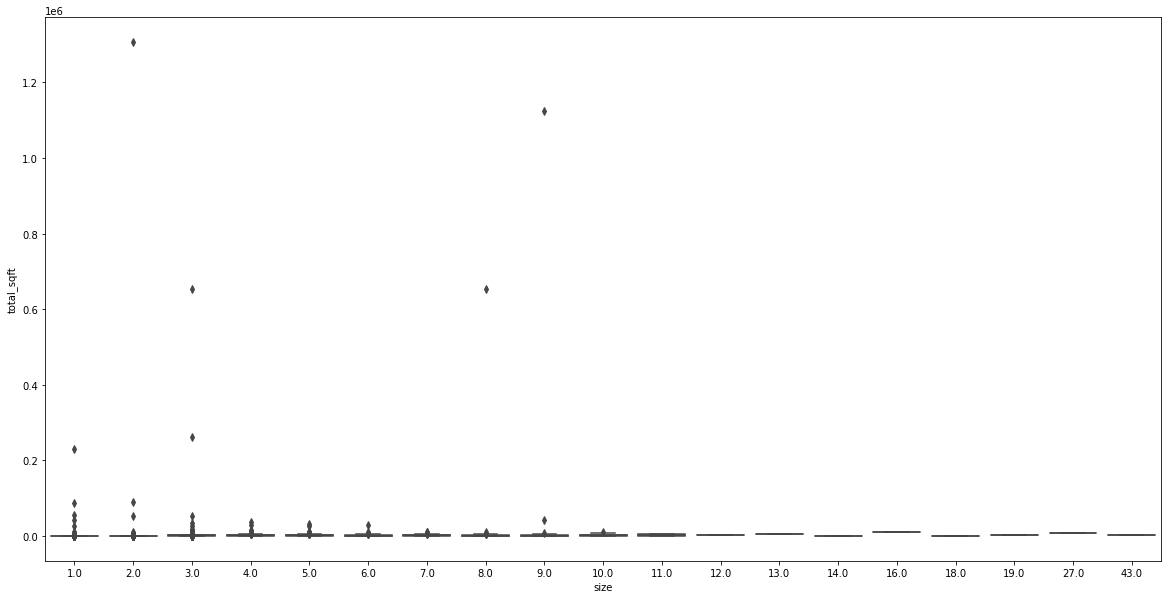

In [0]:
#visualisation
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.boxplot(y = train.total_sqft, x= train['size'])

In [0]:
#impute bhk by tsqft
#bath by bhk
#balcony by bhk
train1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Not ready to move,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5.0,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4.0,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,Super built-up Area,Not ready to move,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [0]:
def size_imputer(x):
  if str(x['size']) == 'nan':
    if x.total_sqft <= 1000:
      return 1
    elif x.total_sqft <= 1500:
      return 2
    elif x.total_sqft <= 2000:
      return 3
    elif x.total_sqft <= 2500:
      return 4
    elif x.total_sqft <= 3000:
      return 5
    elif x.total_sqft <= 3500:
      return 6
    elif x.total_sqft <= 4000:
      return 7
    elif x.total_sqft <= 4500:
      return 8
    elif x.total_sqft <= 5000:
      return 9
  else:
    return x['size']

In [0]:
train1['size'] = train1.apply(lambda x: size_imputer(x),axis=1)

In [0]:
train_bath_mode = train1.groupby(by='size')['bath'].agg(lambda x:x.value_counts().index[0])
train_bath_mode
def bath_imputer(x):
  if str(x['bath']) == 'nan':
    return train_bath_mode[x['size']]
  else:
    return x['bath']

In [0]:
#train['bath'] = train.apply(lambda x: bath_imputer(x),axis=1)
train_bath_mode = train1.groupby(by='size')['bath'].agg(lambda x:x.value_counts().index[0])

In [0]:
def b_not_null(x):
  try:
    return x.value_counts().index[0]
  except:
    return 0
train_balcony_mode = train1.groupby(by='size')['balcony'].agg(lambda x:b_not_null(x))
def balcony_imputer(x):
  if str(x['balcony']) == 'nan':
    return train_balcony_mode[x['size']]
  else:
    return x['balcony']
train1['balcony'] = train1.apply(lambda x: balcony_imputer(x),axis=1)

In [0]:
train1.dropna(axis=0,inplace= True)
train1.total_sqft = train1.total_sqft.apply(lambda x : x/(train.total_sqft.max()-train.total_sqft.min()))

In [0]:
train_dummy1 = pd.get_dummies(train1,columns=['area_type','availability','location','size','balcony','bath'])

In [0]:
X = train_dummy1.drop(columns= 'price')
Y = train_dummy1.price

In [0]:
from sklearn.model_selection import train_test_split #To split the data we use train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_test], [y_pred]))
print('MAE',metrics.median_absolute_error([y_test],[y_pred]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pred])))

MSE 6846.246801179681
MAE 29.379187942424764
RMSE 82.74204977627568


In [0]:
#miss forest approach

!pip install DistributedMissForest
!pip install missingpy

  Created wheel for DistributedMissForest: filename=DistributedMissForest-1.4-cp36-none-any.whl size=17489 sha256=f11b424edf60e5afad8f1ccdbe009d7979c37f9f4f51b2f4d99565702ed186eb
  Stored in directory: /root/.cache/pip/wheels/85/d2/cb/99da0c787e5504f3023725d22aa450dcb4fc5f544fb6410d51
Successfully built DistributedMissForest
     |████████████████████████████████| 51kB 1.6MB/s 


In [0]:
import DistributedMissForest

In [0]:
for i in train.columns:
  if i not in ['price','total_sqft']:
    train[i] = train[i].astype('category')

In [0]:
train.drop(index=(train[train.location.isna()].index),inplace = True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     13319 non-null  category
 1   availability  13319 non-null  category
 2   location      13319 non-null  category
 3   size          13303 non-null  category
 4   total_sqft    13319 non-null  float64 
 5   bath          13246 non-null  category
 6   balcony       12710 non-null  category
 7   price         13319 non-null  float64 
dtypes: category(6), float64(2)
memory usage: 455.4 KB


In [0]:
from missingpy import MissForest
mf = MissForest()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
Xmis = train.values

In [0]:
Ximp = mf.fit_transform(Xmis,cat_vars= [3,5,6])

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [0]:
nnuld = pd.DataFrame(Ximp, columns = train.columns)

2.0    5425
1.0    5001
3.0    1830
0.0    1063
Name: balcony, dtype: int64

In [0]:
nnuld.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [0]:
train_dummy1 = pd.get_dummies(nnuld,columns=['area_type','availability','location','size','balcony','bath'])

In [0]:
X = train_dummy1.drop(columns= 'price')
Y = train_dummy1.price
from sklearn.model_selection import train_test_split #To split the data we use train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_test], [y_pred]))
print('MAE',metrics.median_absolute_error([y_test],[y_pred]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pred])))

MSE 9172.16738625892
MAE 29.46296679054958
RMSE 95.77143303855759


In [0]:
a = train.groupby('location')['price'].mean()

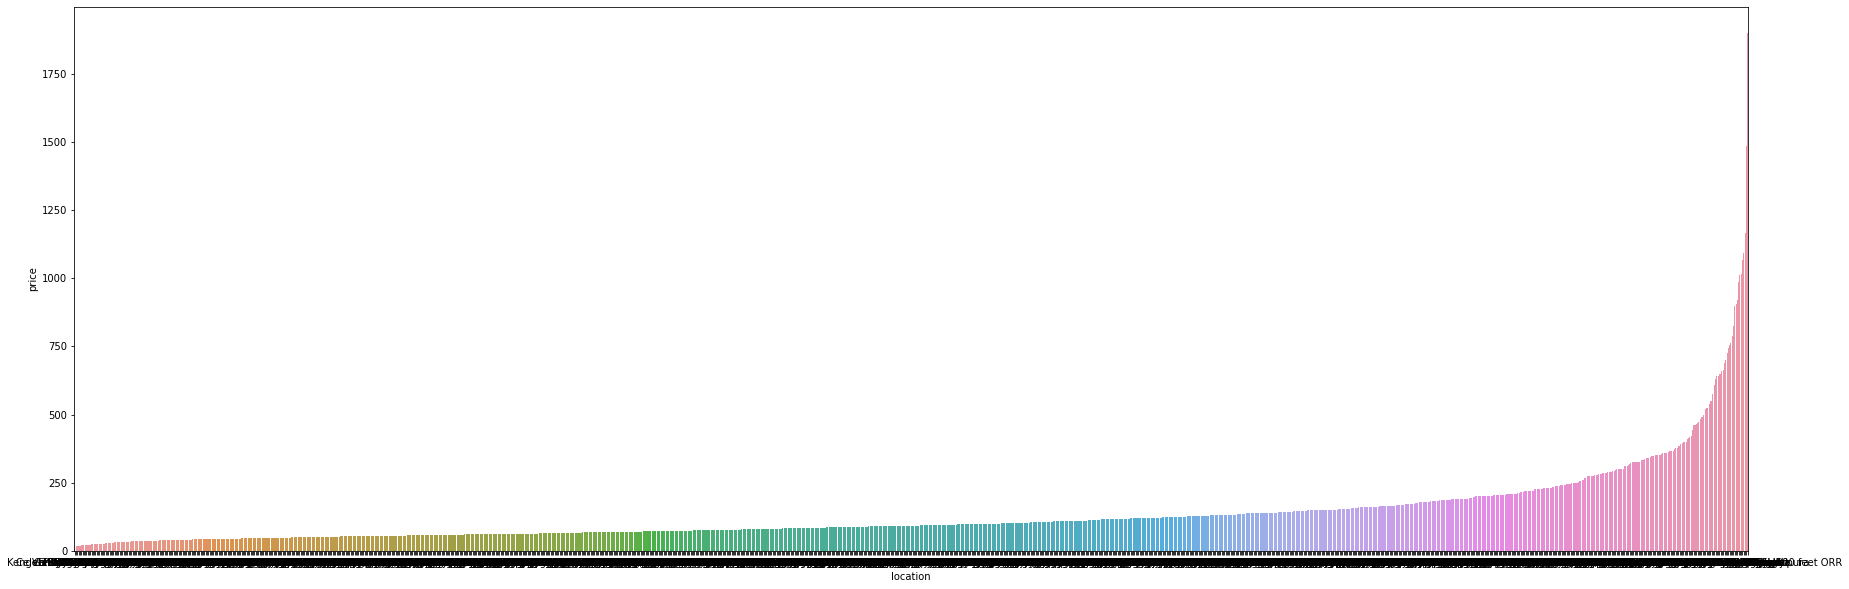

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
sns.barplot(x = a.sort_values().index,y=a.sort_values())

# Droping NA values

In [0]:
train2.dropna(axis = 0 , inplace= True)

In [0]:
train_dummy1 = pd.get_dummies(train2,columns=['area_type','availability','location','size','balcony','bath'])
X = train_dummy1.drop(columns= 'price')
Y = train_dummy1.price
from sklearn.model_selection import train_test_split #To split the data we use train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_test], [y_pred]))
print('MAE',metrics.median_absolute_error([y_test],[y_pred]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pred])))

MSE 7867.383983649313
MAE 28.762764930383156
RMSE 88.6982749756122


# Replacing NA values by mode


In [0]:
train3.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [0]:
def mod_replacer_size(x):
  if str(x) == 'nan':
    return train3['size'].value_counts().index[0]
  else:
    return x

def mod_replacer_bath(x):
  if str(x) == 'nan':
    return train3['bath'].value_counts().index[0]
  else:
    return x
def mod_replacer_balcony(x):
  if str(x) == 'nan':
    return train3['balcony'].value_counts().index[0]
  else:
    return x

In [0]:
train3['size'] = train3['size'].apply(lambda x : mod_replacer_size(x))
train3['bath'] = train3['bath'].apply(lambda x : mod_replacer_bath(x))
train3['balcony'] = train3['balcony'].apply(lambda x : mod_replacer_balcony(x))
train3['p/sqft'] = train3['price'] / train3['total_sqft']

In [0]:
train_dummy1 = pd.get_dummies(train3,columns=['area_type','availability','location','size','balcony','bath'])
X = train_dummy1.drop(columns= ['price','p/sqft'])
Y = train_dummy1.price
from sklearn.model_selection import train_test_split #To split the data we use train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = regressor.predict(x_test)
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_test], [y_pred]))
print('MAE',metrics.median_absolute_error([y_test],[y_pred]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[y_pred])))

MSE 5516.489484710133
MAE 28.141133808931613
RMSE 74.27307375294315


In [0]:
import xgboost as xgb
params = {}
params['eval_metric'] = 'logloss'
params['eta'] = 0.02

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
predict_y = bst.predict(d_test)

[0]	train-logloss:-4152.81	valid-logloss:-3939.01
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:-4153.03	valid-logloss:-3939.01
[20]	train-logloss:-4153.03	valid-logloss:-3939.01
Stopping. Best iteration:
[0]	train-logloss:-4152.81	valid-logloss:-3939.01



In [0]:
watchlisty_pred = regressor.predict(x_test)
from sklearn import metrics
import numpy as np
print('MSE',metrics.mean_squared_error([y_test], [predict_y]))
print('MAE',metrics.median_absolute_error([y_test],[predict_y]))
print('RMSE',np.sqrt(metrics.mean_squared_error([y_test],[predict_y])))

MSE 15024.169180146617
MAE 70.45867683161487
RMSE 122.57311768959218
